In [62]:
import numpy as np 
import pandas as pd 
import os
import cv2

import tensorflow as tf

from glob import glob
from tqdm import tqdm

import matplotlib.pyplot as plt
from PIL import Image

# Import the images and normalize

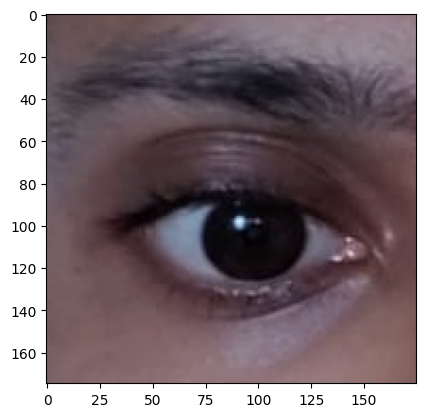

In [63]:
img_array = cv2.imread('/kaggle/input/eyes-openclose/dataset/train/Open/_0.jpg')
plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))

In [64]:
img_size = 128

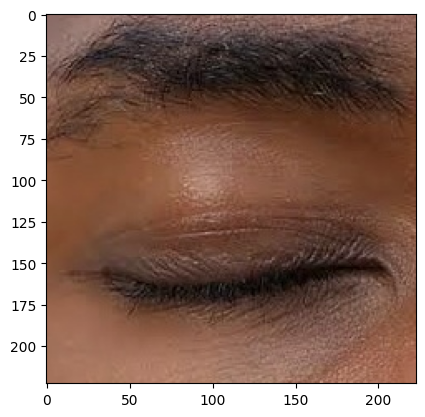

In [65]:
Datadirectory = '/kaggle/input/eyes-openclose/dataset/train'
Classes = ['Closed', 'Open']
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break


In [66]:
training_data = []

def create_training_data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try :
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_COLOR)
                backtorgb = cv2.cvtColor(img_array,cv2.COLOR_BGR2GRAY)
                new_array = cv2.resize(backtorgb, (img_size, img_size)) 
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

In [67]:
create_training_data()
print(len(training_data))

1234


In [68]:
import random
random.shuffle(training_data)

In [69]:
X = []
Y = []

for features, label in tqdm(training_data):
    X.append(features)
    Y.append(label)
X = np.array(X).reshape(-1, img_size, img_size, 1)


100%|██████████| 1234/1234 [00:00<00:00, 976929.24it/s]


In [70]:
X=X/255

In [71]:
X.shape


(1234, 128, 128, 1)

In [72]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Split data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

datagen = ImageDataGenerator(
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow(X_train, Y_train, batch_size=32)
validation_generator = datagen.flow(X_val, Y_val, batch_size=32)

# CNN Model

In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Conv2D, BatchNormalization, MaxPooling2D,Dropout, Flatten

model_simple = Sequential([
    Input(shape=(img_size, img_size, 1)),

    Conv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu'),
    MaxPooling2D(),
    Dropout(0.2),

    Conv2D(filters = 64, kernel_size = 5, strides = 1, activation = 'relu'),
    MaxPooling2D(),
    Dropout(0.2),
    
    Conv2D(filters = 32, kernel_size = 3, strides = 1, activation = 'relu'),
    MaxPooling2D(),
    Dropout(0.2),

    Conv2D(filters = 16, kernel_size = 3, strides = 1, activation = 'relu'),
    MaxPooling2D(),
    Dropout(0.2),
    
    Flatten(),
    
    Dense(units  = 128, activation = 'relu'),
    Dense(units = 1, activation = 'sigmoid')
])

In [74]:
model_simple.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model_simple.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_56 (Conv2D)              │ (None, 124, 124, 32)   │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_43 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_50 (Dropout)            │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_57 (Conv2D)              │ (None, 58, 58, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_44 (MaxPooling2D) │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_51 (Dropout)            │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (None, 27, 27, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_45 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_52 (Dropout)            │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 11, 11, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_46 (MaxPooling2D) │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_53 (Dropout)            │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 128)            │        51,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 126,641 (494.69 KB)

 Trainable params: 126,641 (494.69 KB)

 Non-trainable params: 0 (0.00 B)

In [75]:
callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='SimpleModel.keras',
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose =1)

history = model_simple.fit(train_generator, epochs=20, validation_data=validation_generator, callbacks=callback)

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 659ms/step - accuracy: 0.6106 - loss: 0.6461
Epoch 1: val_loss improved from inf to 0.42201, saving model to SimpleModel.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 25s 719ms/step - accuracy: 0.6132 - loss: 0.6440 - val_accuracy: 0.8745 - val_loss: 0.4220
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 650ms/step - accuracy: 0.8091 - loss: 0.4779
Epoch 2: val_loss improved from 0.42201 to 0.31362, saving model to SimpleModel.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 22s 701ms/step - accuracy: 0.8098 - loss: 0.4764 - val_accuracy: 0.9150 - val_loss: 0.3136
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 681ms/step - accuracy: 0.8201 - loss: 0.4026
Epoch 3: val_loss improved from 0.31362 to 0.25323, saving model to SimpleModel.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 23s 730ms/step - accuracy: 0.8207 - loss: 0.4014 - val_accuracy: 0.9312 - val_loss: 0.2532
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 678ms/step - accuracy: 0.9186 - loss: 0.2463
Epoch 4: val_loss did not improve from 0.25323
31/31 ━━━━━━

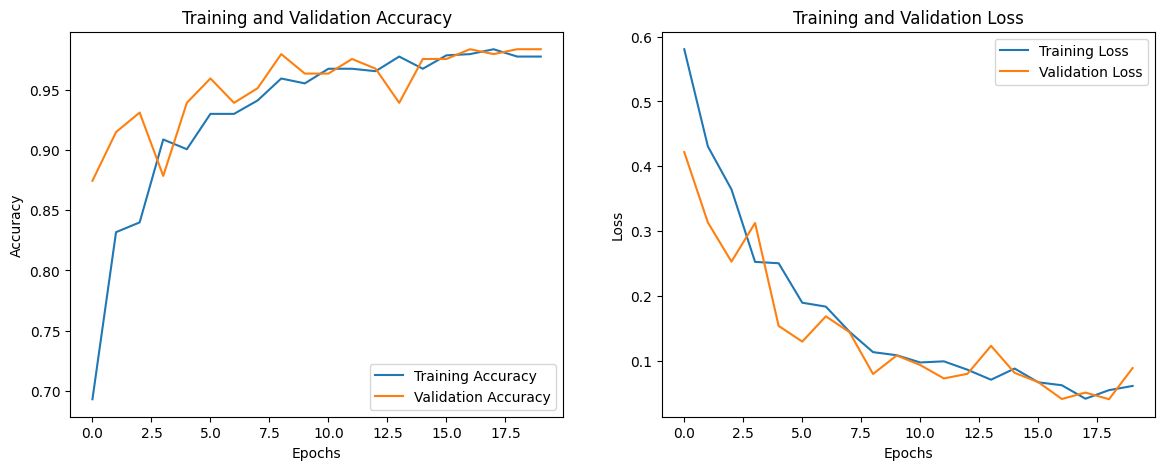

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


# Evaluate and Load model performance

In [77]:
model_simple.evaluate(validation_generator)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step - accuracy: 0.9834 - loss: 0.0787


[0.09601900726556778, 0.9797570705413818]

In [78]:
from keras.models import load_model
best_model = load_model('/kaggle/working/SimpleModel.keras')
best_model.evaluate(validation_generator)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 173ms/step - accuracy: 0.9914 - loss: 0.0353


[0.041452523320913315, 0.9878542423248291]

# Test the model with a random image

In [79]:
from tensorflow.keras.preprocessing import image

# Load the saved model
model = tf.keras.models.load_model('SimpleModel.keras')

def predict_eye_state(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)  # Read the color image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

    img = cv2.resize(img, (img_size, img_size))

    img_array = np.expand_dims(img, axis=-1)  # Add channel dimension for grayscale
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize pixel values to [0, 1]


    # Make a prediction
    prediction = model.predict(img_array)

    # Interpret the result
    if prediction[0] > 0.5:
        print("The eye is open.")
    else:
        print("The eye is closed.")

# Test with a random image
predict_eye_state('/kaggle/input/eyes-openclose/dataset/test/Closed/_116.jpg')  # Replace with the path to your test image


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
The eye is closed.


# Confusion Matrix

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━

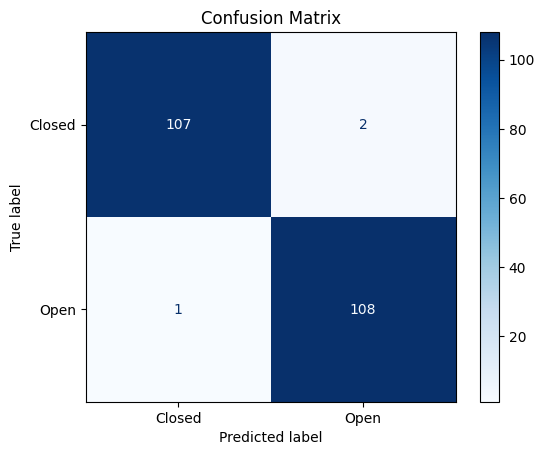

In [80]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

model = tf.keras.models.load_model('SimpleModel.keras')

test_dir = '/kaggle/input/eyes-openclose/dataset/test/'
classes = ['Closed', 'Open']

true_labels = []
predictions = []

for label, class_name in enumerate(classes):
    class_dir = os.path.join(test_dir, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)

        # Load image
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)  # Read the color image
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
        img = cv2.resize(img, (img_size, img_size))  # Resize to match input shape
        img_array = np.expand_dims(img, axis=-1)  # Add channel dimension
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        img_array = img_array / 255.0  # Normalize to [0, 1]

        # Predict using the model
        prediction = model.predict(img_array)[0][0]  # Get the prediction value
        predictions.append(1 if prediction > 0.5 else 0)  # Threshold at 0.5 for binary classification

        # Add true label
        true_labels.append(label)
        
cm = confusion_matrix(true_labels, predictions, labels=[0, 1])

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━

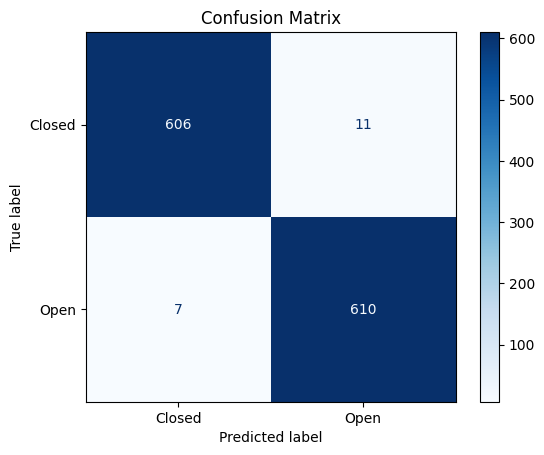

In [81]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

model = tf.keras.models.load_model('SimpleModel.keras')

test_dir = '/kaggle/input/eyes-openclose/dataset/train/'
classes = ['Closed', 'Open']

true_labels = []
predictions = []

for label, class_name in enumerate(classes):
    class_dir = os.path.join(test_dir, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)

        # Load image
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)  # Read the color image
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
        img = cv2.resize(img, (img_size, img_size))  # Resize to match input shape
        img_array = np.expand_dims(img, axis=-1)  # Add channel dimension
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        img_array = img_array / 255.0  # Normalize to [0, 1]

        # Predict using the model
        prediction = model.predict(img_array)[0][0]  # Get the prediction value
        predictions.append(1 if prediction > 0.5 else 0)  # Threshold at 0.5 for binary classification

        # Add true label
        true_labels.append(label)
        
cm = confusion_matrix(true_labels, predictions, labels=[0, 1])

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()